In [1]:
%matplotlib inline
import pandas as pd
import seaborn as sn
import critical_loads as cl
sn.set_context('notebook')

# Refactoring Max's Fortran code

This notebook tests my refactored version of Max Posch's Fortran code. The original is described [here](http://www.rivm.nl/media/documenten/cce/manual/binnenop17Juni/Ch7-MapMan-2016-04-26_vf.pdf) (see especially section VII.4).

First of all, define an arbitrary Critical Load Function (CLF) and plot a few test points. We can use the plot to work out which region each point belongs in.

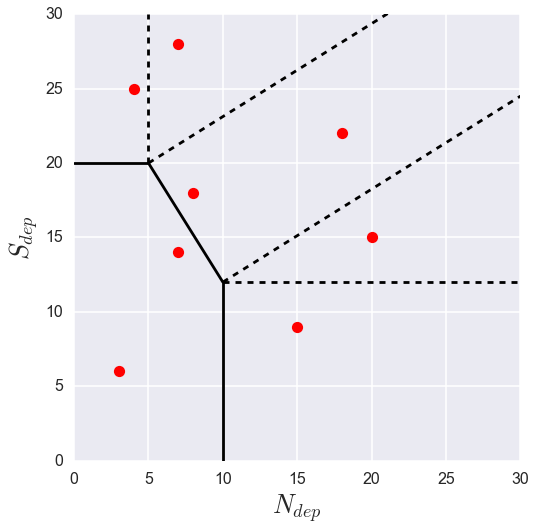

In [2]:
# Define CLF
cln_min = 5
cln_max = 10
cls_min = 12
cls_max = 20

# Test point coords
ndeps = [3, 7, 8, 15, 20, 18, 7, 4]
sdeps = [6, 14, 18, 9, 15, 22, 28, 25]

# Plot CLF
cl.plot_critical_loads_func(cln_min, cln_max, cls_min, cls_max, 
                            ndeps, sdeps)

Based on the plot, we can manually classify each of the above points into one of six regions (as defined in Figure VII.3 of the [PDF](http://www.rivm.nl/media/documenten/cce/manual/binnenop17Juni/Ch7-MapMan-2016-04-26_vf.pdf))

In [3]:
# Manually classified regions
regs = [0, 0, 3, 1, 2, 3, 4, 5]

#Build into df
df = pd.DataFrame({'N':ndeps,
                   'S':sdeps,
                   'region_manual':regs})

df

,N,S,region_manual
0,3,6,0
1,7,14,0
2,8,18,3
3,15,9,1
4,20,15,2
5,18,22,3
6,7,28,4
7,4,25,5


Next, apply the refactored Fortran function to check it assigns each point to the correct region.

In [4]:
def f(row):
    """ Rough wrapper around exceed_ns_icpm for Pandas.
    """
    res = cl.exceed_ns_icpm(cln_min, cln_max, cls_min, cls_max,
                            row['N'], row['S'])
    
    return res[2]    

# Apply refactored func
df['region_func'] = df.apply(f, axis=1)

assert (df['region_manual'] == df['region_func']).all()

df

,N,S,region_manual,region_func
0,3,6,0,0
1,7,14,0,0
2,8,18,3,3
3,15,9,1,1
4,20,15,2,2
5,18,22,3,3
6,7,28,4,4
7,4,25,5,5
